<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/ml_python.png' width=600/></center>

# 실습 내용

- K-Fold Cross Validation을 사용해 모델의 성능을 예측합니다.

# 1.환경 준비

- 기본 라이브러리와 대상 데이터를 가져와 이후 과정을 준비합니다.

In [51]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [52]:
# 데이터 읽어오기
path = 'https://raw.githubusercontent.com/Jangrae/csv/master/iris.csv'
data = pd.read_csv(path)

# 2.데이터 이해

- 분석할 데이터를 충분히 이해할 수 있도록 다양한 탐색 과정을 수행합니다.

In [53]:
# 데이터 살펴보기
data.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [54]:
# 기초통계정보 확인
data.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# 3.데이터 준비

- 전처리 과정을 통해 머신러닝 알고리즘에 사용할 수 있는 형태의 데이터를 준비합니다.

**1) x, y 분리**

In [55]:
# Target 확인
target = 'Species'

# 데이터 분리
x = data.drop(target, axis=1)
y = data[target]

**2) 정규화**

> 정규화를 하면 값이, 0 과 1 사이  
> p.s target은 건드리지말기     
> x만 정규화 해주면 된다!

In [56]:
# 정규화
x = (x - x.min()) / (x.max() - x.min())

**3) 학습용, 평가용 데이터 분리**

In [57]:
# 라이브러리 불러오기
from sklearn.model_selection import train_test_split

# 학습용, 평가용 데이터 7:3으로 분리
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, 
                                                    random_state=2022)

# 4.성능 예측

- K분할 교차 검증 방법으로 모델 성능을 예측합니다.
- cross_val_score(model, x_train, y_train, cv=n) 형태로 사용합니다.
- cv 옵션에 k값(분할 개수, 기본값=5)을 지정합니다.
- cross_val_score 함수는 넘파이 배열 형태의 값을 반환합니다.
- cross_val_score 함수 반환 값의 평균을 해당 모델의 예측 성능으로 볼 수 있습니다.


## 4.1.Decision Tree

In [58]:
# 불러오기
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

# 선언하기 
model = DecisionTreeClassifier(random_state=2022)

# 학습, 예측, 평가하기                                     # cv 의미 : 분할 갯수
cv_score = cross_val_score(model, x_train, y_train, cv=10) # cv=5 : 디폴트값

# 확인
print(cv_score)
print('평균:', cv_score.mean()) # 분류 - accuracy_score 라고 생각하면 됨
print('표준편차:', cv_score.std())

[1.         1.         0.90909091 1.         0.90909091 0.9
 0.8        1.         1.         1.        ]
평균: 0.9518181818181819
표준편차: 0.06581341017359368


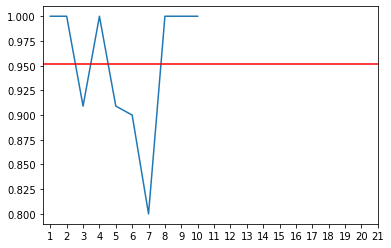

In [59]:
# 성능 정보 시각화
plt.plot(cv_score)
plt.axhline(cv_score.mean(), color='r')
plt.xticks(range(0, 21), range(1, 22)) # plt.xticks(x축 범위, 그 위치에 출력할 값)
plt.show()

## 4.2.KNN

In [60]:
# 불러오기
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# 선언하기 
model = KNeighborsClassifier(n_neighbors=5)

# 학습, 예측, 평가하기                                      # cv 의미 : 분할 갯수
cv_score = cross_val_score(model, x_train, y_train, cv=10) # cv=5 : 디폴트값

# 확인
print(cv_score)
print('평균:', cv_score.mean())
print('표준편차', cv_score.std())

[1.         1.         1.         1.         0.90909091 1.
 0.7        1.         1.         1.        ]
평균: 0.9609090909090909
표준편차 0.09109526391332329


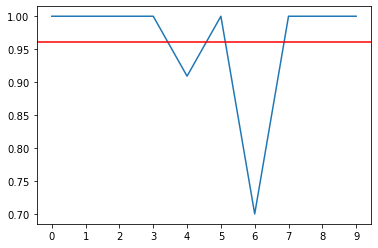

In [61]:
# 성능 정보 시각화
plt.plot(cv_score)
plt.axhline(cv_score.mean(), color='r')
plt.xticks(range(0, 10))
plt.show()

In [62]:
# 성능 정보 수집
score = []
my_cv = []
my_neighbors = []
# cross_val_score 에서 cv값은 k-fold cross validation에서 몇 개의 분할을 사용할 것인지를 정해준다.
# 따라서, cv값이 적어도 2는 되어야 분할이 이루어지기 때문에 (=모든 데이터가 평가에 한 번, 학습에 k-1번 사용)
# range에서 2 부터 시작 한다.

for c in range(2, 21) :
    for n in range(1, 11) :
        model = KNeighborsClassifier(n_neighbors=n)
        cv_score = cross_val_score(model, x_train, y_train, cv=c)
        score.append(cv_score.mean())
        my_cv.append(c)
        my_neighbors.append(n)
        
result = pd.DataFrame()
result['cv'] = my_cv
result['my_neigbors'] = my_neigbors
result['score'] = score
result.sort_values(by='score', ascending=True, inplace=True)
result

,cv,my_neigbors,score
9,2,10,0.913824
8,2,9,0.923440
7,2,8,0.923440
11,3,2,0.923810
31,5,2,0.923810
...,...,...,...
167,18,8,0.962963
165,18,6,0.962963
164,18,5,0.962963
163,18,4,0.962963


> cv=2 이고 my_neigbors=10 일때, 모델성능이 가장 좋다.

## 4.3.Logistic Regression

- LogisticRegression 사용시 발생하는 Warning을 없애려면 충분한 max_iter를 지정합니다.

In [63]:
# 불러오기
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# 선언하기 
model = LogisticRegression(max_iter=500) # # max_iter=500 : 반복횟수

# 학습, 예측, 평가하기                                      # cv 의미 : 분할 갯수
cv_score = cross_val_score(model, x_train, y_train, cv=10) # cv=5 : 디폴트값

# 확인
print(cv_score)
print('평균:', cv_score.mean())
print('표준편차:', cv_score.std())

[1.         1.         0.90909091 1.         0.81818182 0.9
 0.7        0.9        1.         1.        ]
평균: 0.9227272727272726
표준편차: 0.09571393328451919


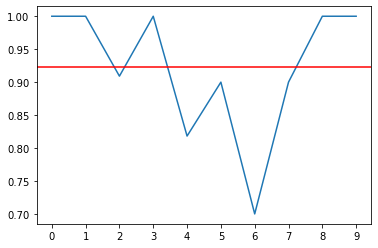

In [64]:
# 성능 정보 시각화
plt.plot(cv_score)
plt.axhline(cv_score.mean(), color='r')
plt.xticks(range(0, 10))
plt.show()

>  K-Fold Cross Validation(=K분할교차검증) 으로 한 결과,  
> K-Nearest Neighbor 이 성능이 가장 좋게 나왔다. 그 중에서도 성능이 좋은 파라미터를 for문으로 찾아보자! (knn밑에 해봄!)